In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle

# 设置科研绘图风格
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 11
mpl.rcParams['axes.titlesize'] = 13
mpl.rcParams['axes.labelsize'] = 11
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 9
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['grid.alpha'] = 0.3
mpl.rcParams['grid.linestyle'] = '--'

data = pd.read_excel('C:/Users/ym_ya/Desktop/windpower/Simulation code and data/section 4/point_at_tau=0.5.xlsx')

In [2]:
true_values = data['actual'].values
qrlasso = data['QRLASSO'].values
qrf = data['QRFG'].values
qrnn = data['QRNN2G'].values
mcqrnn = data['MCQRNNG'].values
vrlg = data['VRLG'].values
wrgg = data['WRGG'].values
ermg = data['ERMG'].values
tsmg = data['TSMG'].values
trqg = data['TRQG'].values
trmg = data['TRMG'].values

x = np.arange(len(data))

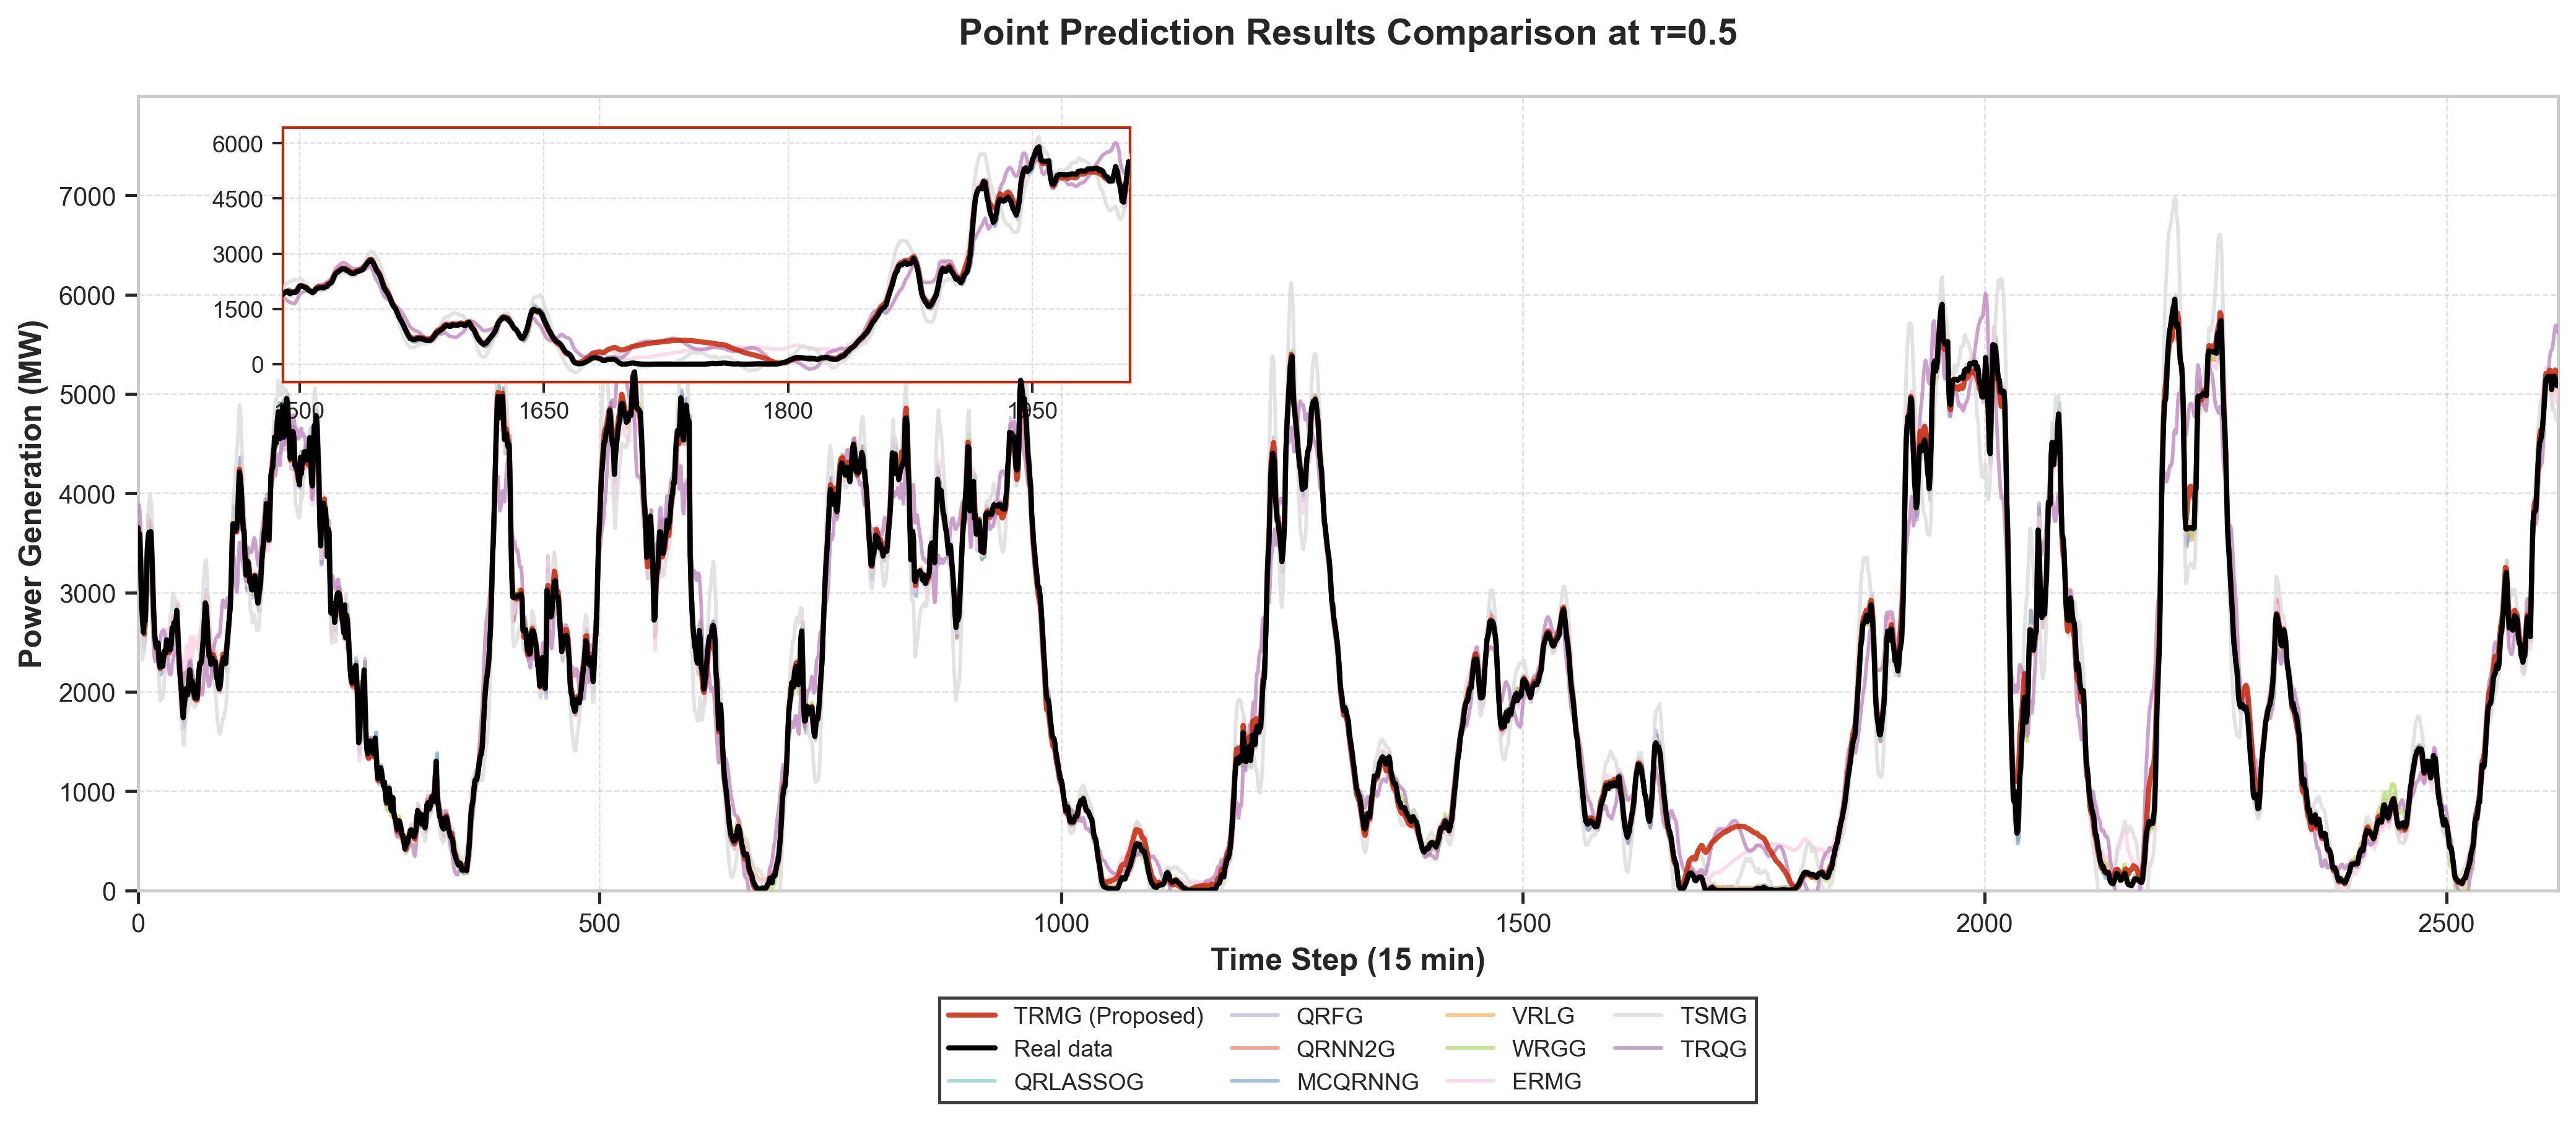

✓ 图片已保存:
  - PNG格式（600 DPI）: point_prediction_scientific.png
  - PDF格式（矢量图）: point_prediction_scientific.pdf


In [3]:
real_color = '#000000'


model_colors = {
    'QRLASSOG': '#8DD3C7',   # 青绿色
    'QRFG': '#BEBADA',       # 淡紫色
    'QRNN2G': '#FB8072',     # 浅红色
    'MCQRNNG': '#80B1D3',    # 浅蓝色
    'VRLG': '#FDB462',       # 橙色
    'WRGG': '#B3DE69',       # 黄绿色
    'ERMG': '#FCCDE5',       # 粉色
    'TSMG': '#D9D9D9',       # 灰色
    'TRQG': '#BC80BD',       # 紫色
}

# TRMG：使用深色强调（你的提出模型）
trmg_color = '#C82506'      # 深红色（强调色）
trmg_linewidth = 2.0        # 适中的线宽
trmg_alpha = 0.85           # 略微透明，不覆盖其他线条

# 其他模型的线宽和透明度
other_linewidth = 1.4
other_alpha = 0.75

# ==================== 创建主图 ====================
fig, ax = plt.subplots(figsize=(14, 7), dpi=300)

# 绘制各模型曲线（先绘制其他模型，TRMG最后绘制以确保在最上层）
lines = []

# 真实数据（黑色，较粗，在最上层）
lines.append(ax.plot(x, true_values, color=real_color, label='Real data',
                     linewidth=2.0, zorder=25)[0])

# 其他对比模型（使用科研配色）
lines.append(ax.plot(x, qrlasso, color=model_colors['QRLASSOG'], label='QRLASSOG',
                     linewidth=other_linewidth, alpha=other_alpha, zorder=5)[0])
lines.append(ax.plot(x, qrf, color=model_colors['QRFG'], label='QRFG',
                     linewidth=other_linewidth, alpha=other_alpha, zorder=5)[0])
lines.append(ax.plot(x, qrnn, color=model_colors['QRNN2G'], label='QRNN2G',
                     linewidth=other_linewidth, alpha=other_alpha, zorder=5)[0])
lines.append(ax.plot(x, mcqrnn, color=model_colors['MCQRNNG'], label='MCQRNNG',
                     linewidth=other_linewidth, alpha=other_alpha, zorder=5)[0])
lines.append(ax.plot(x, vrlg, color=model_colors['VRLG'], label='VRLG',
                     linewidth=other_linewidth, alpha=other_alpha, zorder=5)[0])
lines.append(ax.plot(x, wrgg, color=model_colors['WRGG'], label='WRGG',
                     linewidth=other_linewidth, alpha=other_alpha, zorder=5)[0])
lines.append(ax.plot(x, ermg, color=model_colors['ERMG'], label='ERMG',
                     linewidth=other_linewidth, alpha=other_alpha, zorder=5)[0])
lines.append(ax.plot(x, tsmg, color=model_colors['TSMG'], label='TSMG',
                     linewidth=other_linewidth, alpha=other_alpha, zorder=5)[0])
lines.append(ax.plot(x, trqg, color=model_colors['TRQG'], label='TRQG',
                     linewidth=other_linewidth, alpha=other_alpha, zorder=5)[0])

# TRMG模型（最后绘制，确保在最上层，深色强调）
lines.append(ax.plot(x, trmg, color=trmg_color, label='TRMG (Proposed)',
                     linewidth=trmg_linewidth, alpha=trmg_alpha, zorder=20)[0])

# ==================== 设置坐标轴 ====================
ax.set_ylim(0, 8000)
ax.set_xlim(0, 2621)

# 标题和标签
ax.set_title('Point Prediction Results Comparison at τ=0.5',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Time Step (15 min)', fontsize=12, fontweight='semibold')
ax.set_ylabel('Power Generation (MW)', fontsize=12, fontweight='semibold')

# 刻度设置
ax.tick_params(direction='out', length=5, width=1.2, which='major')
x_ticks = [0, 500, 1000, 1500, 2000, 2500]
ax.set_xticks(x_ticks)

y_ticks = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
ax.set_yticks(y_ticks)

# 网格线
ax.grid(True, alpha=0.25, linestyle='--', linewidth=0.6, color='gray')
ax.set_axisbelow(True)

# ==================== 优化图例布局 ====================
# 将TRMG放在图例第一位
handles, labels = ax.get_legend_handles_labels()
trmg_idx = labels.index('TRMG (Proposed)')
trmg_handle = handles.pop(trmg_idx)
trmg_label = labels.pop(trmg_idx)
handles.insert(0, trmg_handle)
labels.insert(0, trmg_label)

# 创建图例（4列布局，紧凑排列）
legend = ax.legend(handles, labels,
                   loc='upper center',
                   bbox_to_anchor=(0.5, -0.12),
                   ncol=4,
                   frameon=True,
                   fancybox=False,
                   shadow=False,
                   edgecolor='#333333',
                   framealpha=0.95,
                   columnspacing=1.2,
                   handlelength=2.0)

# 设置图例边框
legend.get_frame().set_linewidth(1.2)

# ==================== 创建局部放大图 ====================
# 放置在左上角空白区域（不遮挡主要数据）
# 位置参数：[left, bottom, width, height] in figure coordinates
# 调整位置更靠上，避免遮挡原始曲线
axins = ax.inset_axes([0.06, 0.64, 0.35, 0.32])

# 在放大图中绘制（保持相同配色和样式）
axins.plot(x, true_values, color=real_color, linewidth=2.0, zorder=25)
axins.plot(x, qrlasso, color=model_colors['QRLASSOG'], linewidth=other_linewidth, alpha=other_alpha, zorder=5)
axins.plot(x, qrf, color=model_colors['QRFG'], linewidth=other_linewidth, alpha=other_alpha, zorder=5)
axins.plot(x, qrnn, color=model_colors['QRNN2G'], linewidth=other_linewidth, alpha=other_alpha, zorder=5)
axins.plot(x, mcqrnn, color=model_colors['MCQRNNG'], linewidth=other_linewidth, alpha=other_alpha, zorder=5)
axins.plot(x, ermg, color=model_colors['ERMG'], linewidth=other_linewidth, alpha=other_alpha, zorder=5)
axins.plot(x, tsmg, color=model_colors['TSMG'], linewidth=other_linewidth, alpha=other_alpha, zorder=5)
axins.plot(x, trqg, color=model_colors['TRQG'], linewidth=other_linewidth, alpha=other_alpha, zorder=5)

# TRMG在放大图中也突出显示（使用相同的透明度）
axins.plot(x, trmg, color=trmg_color, linewidth=trmg_linewidth, alpha=trmg_alpha, zorder=20)

# ==================== 设置放大区域 ====================
# 选择数据变化较为明显的区域
zone_left = 1500
zone_right = 2000

# 坐标轴的扩展比例
x_ratio = 0.02
y_ratio = 0.08

# X轴显示范围
xlim0 = x[zone_left] - (x[zone_right] - x[zone_left]) * x_ratio
xlim1 = x[zone_right] + (x[zone_right] - x[zone_left]) * x_ratio

# Y轴显示范围（基于该区域的实际数据范围）
y_zone = np.hstack((true_values[zone_left:zone_right],
                    trmg[zone_left:zone_right],
                    qrlasso[zone_left:zone_right],
                    qrf[zone_left:zone_right]))
ylim0 = np.min(y_zone) - (np.max(y_zone) - np.min(y_zone)) * y_ratio
ylim1 = np.max(y_zone) + (np.max(y_zone) - np.min(y_zone)) * y_ratio

# 调整子坐标系的显示范围
axins.set_xlim(xlim0, xlim1)
axins.set_ylim(ylim0, ylim1)

# ==================== 美化放大图 ====================
for spine in axins.spines.values():
    spine.set_edgecolor(trmg_color)
    spine.set_linewidth(1.0)
# 网格和刻度
axins.grid(True, alpha=0.25, linestyle='--', linewidth=0.5, color='gray')
axins.tick_params(direction='out', length=4, width=1.0, labelsize=9)
axins.set_axisbelow(True)

# 刻度数量
axins.xaxis.set_major_locator(plt.MaxNLocator(5))
axins.yaxis.set_major_locator(plt.MaxNLocator(5))


plt.tight_layout(rect=[0, 0.08, 1, 0.98])

# ==================== 保存图片 ====================
# 保存为高分辨率PNG（适合论文发表）
plt.savefig('point_prediction.png',
            dpi=400,
            bbox_inches='tight',
            facecolor='white',
            edgecolor='none',
            pad_inches=0.1)


plt.show()

print("✓ 图片已保存:")
print("  - PNG格式（600 DPI）: point_prediction_scientific.png")

In [4]:
import gc
gc.collect()

190